# Libraries

In [4]:
import requests
from bs4 import BeautifulSoup

import pandas as pd               # gdelt data will be pulled into a Pandas dataframe
import numpy as np                # used for array and vector operations
import gdelt                      # for gdelt searches
import pygeodesy as pgd           # for geohash operations
import marisa_trie as mt          # for creating a trie data structure
import warnings                   # gdelt searches generates a bunch of warnings, so suppress them
warnings.filterwarnings('ignore')

# Geting data

In [5]:
gd = gdelt.gdelt()     # instantiate the gdeltPyR object for searches
data = gd.Search(date=['2024 Jan 1','2024 Oct 31'], normcols=True) # normalize column names to SQL friendly format

In [6]:
data

,globaleventid,sqldate,monthyear,year,fractiondate,actor1code,actor1name,actor1countrycode,actor1knowngroupcode,actor1ethniccode,...,actiongeotype,actiongeofullname,actiongeocountrycode,actiongeoadm1code,actiongeoadm2code,actiongeolat,actiongeolong,actiongeofeatureid,dateadded,sourceurl
0,1150132569,20230106,202301,2023,2023.0164,NaN,NaN,NaN,NaN,NaN,...,3,"Tarpon Springs, Florida, United States",US,USFL,NaN,28.1461,-82.7568,292048,20240106234500,https://greekreporter.com/2024/01/07/epiphany-...
1,1150132570,20230106,202301,2023,2023.0164,NaN,NaN,NaN,NaN,NaN,...,3,"Tarpon Springs, Florida, United States",US,USFL,NaN,28.1461,-82.7568,292048,20240106234500,https://greekreporter.com/2024/01/07/epiphany-...
2,1150132571,20230106,202301,2023,2023.0164,NaN,NaN,NaN,NaN,NaN,...,3,"Tarpon Springs, Florida, United States",US,USFL,NaN,28.1461,-82.7568,292048,20240106234500,https://greekreporter.com/2024/01/07/epiphany-...
3,1150132572,20230106,202301,2023,2023.0164,NaN,NaN,NaN,NaN,NaN,...,3,"Tarpon Springs, Florida, United States",US,USFL,NaN,28.1461,-82.7568,292048,20240106234500,https://greekreporter.com/2024/01/07/epiphany-...
4,1150132573,20230106,202301,2023,2023.0164,CHN,CHINA,CHN,NaN,NaN,...,1,China,CH,CH,NaN,35.0000,105.0000,CH,20240106234500,https://fortune.com/2024/01/06/byd-china-tesla...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317653,1207446285,20241031,202410,2024,2024.8247,was,WASHOE,NaN,NaN,was,...,3,"Reno, Nevada, United States",US,USNV,NV031,39.5296,-119.8140,861100,20241031234500,https://www.2news.com/news/nevada/washoe-count...
317654,1207446286,20241031,202410,2024,2024.8247,was,WASHOE,NaN,NaN,was,...,3,"Washoe County, Nevada, United States",US,USNV,NaN,40.7502,-119.6260,858608,20241031234500,https://www.2news.com/news/nevada/washoe-count...
317655,1207446287,20241031,202410,2024,2024.8247,was,WASHOE,NaN,NaN,was,...,3,"Washoe County, Nevada, United States",US,USNV,NaN,40.7502,-119.6260,858608,20241031234500,https://www.2news.com/news/nevada/washoe-count...
317656,1207446288,20241031,202410,2024,2024.8247,was,WASHOE,NaN,NaN,was,...,3,"Washoe County, Nevada, United States",US,USNV,NaN,40.7502,-119.6260,858608,20241031234500,https://www.2news.com/news/nevada/washoe-count...


In [7]:
country_data = data[data['actiongeocountrycode'].isin(['AR', 'PA', 'BL'])]

In [8]:
country_data['actiongeofullname'].unique()

array(['Malvinas, TucumáAS, Argentina',
       'Buenos Aires, Distrito Federal, Argentina', 'Argentina',
       'Juan Bautista Alberdi, Buenos Aires, Argentina',
       'Asuncion, Villeta, Paraguay', 'Oruro, Oruro, Bolivia', 'Bolivia',
       'La Paz, La Paz, Bolivia', 'La Nacion, Chaco, Argentina',
       'Los Alerces National Park, Chubut, Argentina', 'Paraguay',
       'Patagonia, Argentina (general), Argentina',
       'Cerro Blanco, Cochabamba, Bolivia',
       'Ushuaia, Tierra del Fuego, Antáida e Islas del Atláico Sur, Argentina',
       'Presidente Hayes, Villa Hayes, Paraguay',
       'Gran Chaco, Paraguay (general), Paraguay',
       'Vaca Muerta, San Juan, Argentina',
       'Trapiche, San Luis, Argentina',
       'Nueve De Julio, San Juan, Argentina',
       'Mar Del Plata, Buenos Aires, Argentina',
       'Empexa, PotosíL, Bolivia', 'Tafi, TucumáAS, Argentina',
       'Tarija, Tarija, Bolivia', 'Loma Negra, Buenos Aires, Argentina',
       'Trincheras, Santa Cruz, Bolivia'

In [9]:
country_data.head()

,globaleventid,sqldate,monthyear,year,fractiondate,actor1code,actor1name,actor1countrycode,actor1knowngroupcode,actor1ethniccode,...,actiongeotype,actiongeofullname,actiongeocountrycode,actiongeoadm1code,actiongeoadm2code,actiongeolat,actiongeolong,actiongeofeatureid,dateadded,sourceurl
25,1150132594,20240106,202401,2024,2024.0164,NaN,NaN,NaN,NaN,NaN,...,4,"Malvinas, TucumáAS, Argentina",AR,AR24,4883,-26.9167,-65.2833,-1003014,20240106234500,https://www.dailynewsen.com/breaking/argentina...
28,1150132597,20240106,202401,2024,2024.0164,NaN,NaN,NaN,NaN,NaN,...,4,"Buenos Aires, Distrito Federal, Argentina",AR,AR07,22379,-34.5875,-58.6725,-979186,20240106234500,https://www.dailynewsen.com/breaking/argentina...
65,1150132634,20240106,202401,2024,2024.0164,ARG,ARGENTINE,ARG,NaN,NaN,...,4,"Buenos Aires, Distrito Federal, Argentina",AR,AR07,22379,-34.5875,-58.6725,-979186,20240106234500,https://www.dailynewsen.com/breaking/argentina...
69,1150132638,20240106,202401,2024,2024.0164,ARG,ARGENTINE,ARG,NaN,NaN,...,4,"Buenos Aires, Distrito Federal, Argentina",AR,AR07,22379,-34.5875,-58.6725,-979186,20240106234500,https://www.dailynewsen.com/breaking/argentina...
74,1150132643,20240106,202401,2024,2024.0164,ARGGOV,ARGENTINE,ARG,NaN,NaN,...,4,"Buenos Aires, Distrito Federal, Argentina",AR,AR07,22379,-34.5875,-58.6725,-979186,20240106234500,https://www.dailynewsen.com/breaking/argentina...


## Preprocess

In [10]:
# Eliminar filas con valores NaN
country_data = country_data.dropna(subset=['sourceurl'])

# Eliminar filas duplicadas basadas en la columna 'sourceurl'
country_data = country_data.drop_duplicates(subset=['sourceurl'])

In [11]:
country_data[country_data['globaleventid'] == 1150132594]

,globaleventid,sqldate,monthyear,year,fractiondate,actor1code,actor1name,actor1countrycode,actor1knowngroupcode,actor1ethniccode,...,actiongeotype,actiongeofullname,actiongeocountrycode,actiongeoadm1code,actiongeoadm2code,actiongeolat,actiongeolong,actiongeofeatureid,dateadded,sourceurl
25,1150132594,20240106,202401,2024,2024.0164,NaN,NaN,NaN,NaN,NaN,...,4,"Malvinas, TucumáAS, Argentina",AR,AR24,4883,-26.9167,-65.2833,-1003014,20240106234500,https://www.dailynewsen.com/breaking/argentina...


## Geting Tex

In [ ]:
import newspaper
from newspaper import Article
import pandas as pd

def extract_article_data(df, url_column='sourceurl'):
    """
    Función para extraer el texto, título, resumen y otras informaciones de artículos 
    usando la columna de URL del DataFrame.

    Args:
        df (pandas.DataFrame): DataFrame que contiene las URLs en una columna.
        url_column (str): Nombre de la columna con las URLs de las noticias.

    Returns:
        pandas.DataFrame: DataFrame original con nuevas columnas de información extraída.
    """
    
    # Definir las nuevas columnas
    df['article_text'] = None
    df['article_title'] = None
    df['article_summary'] = None
    df['article_authors'] = None
    df['article_keywords'] = None
    df['article_publish_date'] = None
    df['article_top_image'] = None

    # Iterar sobre cada fila del DataFrame
    for index, row in df.iterrows():
        try:
            url = row[url_column]
            if pd.notna(url):  # Verificar si la URL no es NaN
                article = Article(url)
                article.download()
                article.parse()
                article.nlp()
                
                # Asignar valores extraídos a las nuevas columnas
                df.at[index, 'article_text'] = article.text
                df.at[index, 'article_title'] = article.title
                df.at[index, 'article_summary'] = article.summary
                df.at[index, 'article_authors'] = article.authors
                df.at[index, 'article_keywords'] = article.keywords
                df.at[index, 'article_publish_date'] = article.publish_date
                df.at[index, 'article_top_image'] = article.top_image
        except Exception as e:
            print(f"Error al procesar la URL {url}: {e}")

    return df



ModuleNotFoundError: No module named 'newspaper3k'

In [18]:
# Ejemplo de uso
country_data = extract_article_data(country_data)



NameError: name 'extract_article_data' is not defined

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Descargar los datos de VADER
nltk.download('vader_lexicon')

# Textos para analizar
texts = [
    "Me encanta este producto, es maravilloso!",
    "El servicio fue terrible, no estoy satisfecho.",
    "Es un lugar bastante agradable.",
    "Nunca volveré a usarlo, es una pérdida de tiempo.",
    "La atención al cliente fue excelente."
]

# Inicializar el analizador de sentimientos
sia = SentimentIntensityAnalyzer()

# Analizar sentimientos de los textos
results = [sia.polarity_scores(text) for text in texts]

# Extraer valores de 'compound' score
compound_scores = [res['compound'] for res in results]

# Generar los índices de los textos para el gráfico
x_values = list(range(len(texts)))

# Crear el gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(x_values, compound_scores, color='blue')
plt.xlabel('Índice del Texto')
plt.ylabel('Puntuación Compound')
plt.title('Análisis de Sentimientos de Textos')
plt.xticks(x_values, [f'Texto {i+1}' for i in x_values])
plt.grid(axis='y')

# Mostrar el gráfico
plt.show()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\cesar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


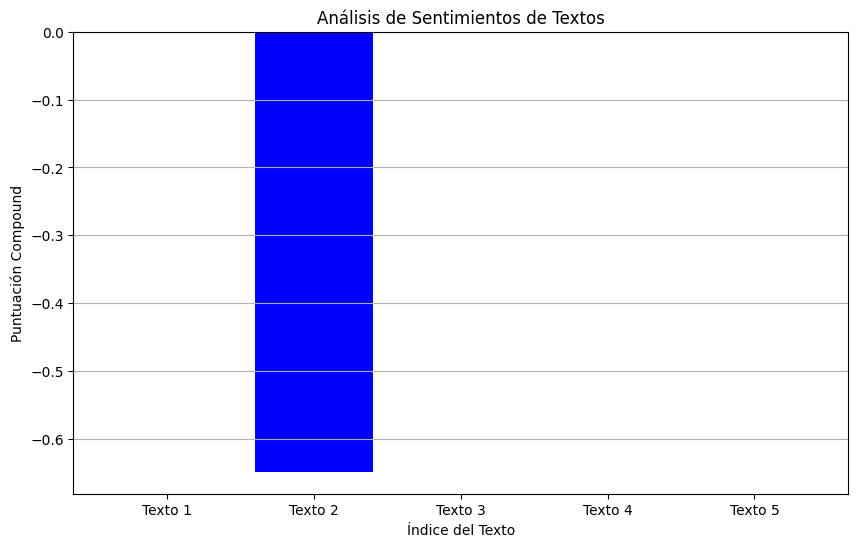

In [21]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Descargar los datos de VADER
nltk.download('vader_lexicon')

# Textos para analizar
texts = [
    "Me encanta este producto, es maravilloso!",
    "El servicio fue terrible, no estoy satisfecho.",
    "Es un lugar bastante agradable.",
    "Nunca volveré a usarlo, es una pérdida de tiempo.",
    "La atención al cliente fue excelente."
]

# Inicializar el analizador de sentimientos
sia = SentimentIntensityAnalyzer()

# Analizar sentimientos de los textos
results = [sia.polarity_scores(text) for text in texts]

# Extraer valores de 'compound' score
compound_scores = [res['compound'] for res in results]

# Generar los índices de los textos para el gráfico
x_values = list(range(len(texts)))

# Crear el gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(x_values, compound_scores, color='blue')
plt.xlabel('Índice del Texto')
plt.ylabel('Puntuación Compound')
plt.title('Análisis de Sentimientos de Textos')
plt.xticks(x_values, [f'Texto {i+1}' for i in x_values])
plt.grid(axis='y')

# Mostrar el gráfico
plt.show()


In [19]:
# Ver las primeras filas del DataFrame con los nuevos datos
print(country_data.head())



      globaleventid   sqldate  monthyear  year  fractiondate actor1code  \
25       1150132594  20240106     202401  2024     2024.0164        NaN   
113      1150132682  20240106     202401  2024     2024.0164     CHRCTH   
5812     1149805837  20240104     202401  2024     2024.0110        ARG   
7138     1149605116  20240103     202401  2024     2024.0082        ARG   
7990     1149605968  20240103     202401  2024     2024.0082        PRY   

       actor1name actor1countrycode actor1knowngroupcode actor1ethniccode  \
25            NaN               NaN                  NaN              NaN   
113      CATHOLIC               NaN                  NaN              NaN   
5812  ARGENTINIAN               ARG                  NaN              NaN   
7138    ARGENTINE               ARG                  NaN              NaN   
7990     ASUNCION               PRY                  NaN              NaN   

      ... actiongeotype                               actiongeofullname  \
25    ...  

In [27]:
country_data.to_csv('data_from_news.csv')